# Droplets Detection

In [1]:
import cv2
import os

In [2]:
# Get the home directory
HOME = os.getcwd()
print(HOME)

/Users/tony/PycharmProjects/DropletsDetection


In [4]:
# Pip install method

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.5 torch-2.0.0 CPU
Setup complete ✅ (8 CPUs, 8.0 GB RAM, 215.7/228.3 GB disk)


In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

In [7]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets


# replace the following with code snippet from Roboflow
# !pip install roboflow --quiet
#
# from roboflow import Roboflow
# rf = Roboflow(api_key="your_API")
# project = rf.workspace("your_work_space").project("your_project")
# dataset = project.version(6).download("yolov8")

/Users/tony/PycharmProjects/DropletsDetection/datasets

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Droplet-Detection-6 in yolov8:: 100%|██████████| 1184/1184 [00:00<00:00, 9956.78it/s]


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=640

/content
100% 21.5M/21.5M [00:00<00:00, 57.5MB/s]
Ultralytics YOLOv8.0.98 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Droplet-Detection-3/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=Fa

The accuracy graphs will be stored in "runs/detect/train/", and the AI model for droplet detection will be stored in "/runs/detect/train/weights/best.pt".

/content


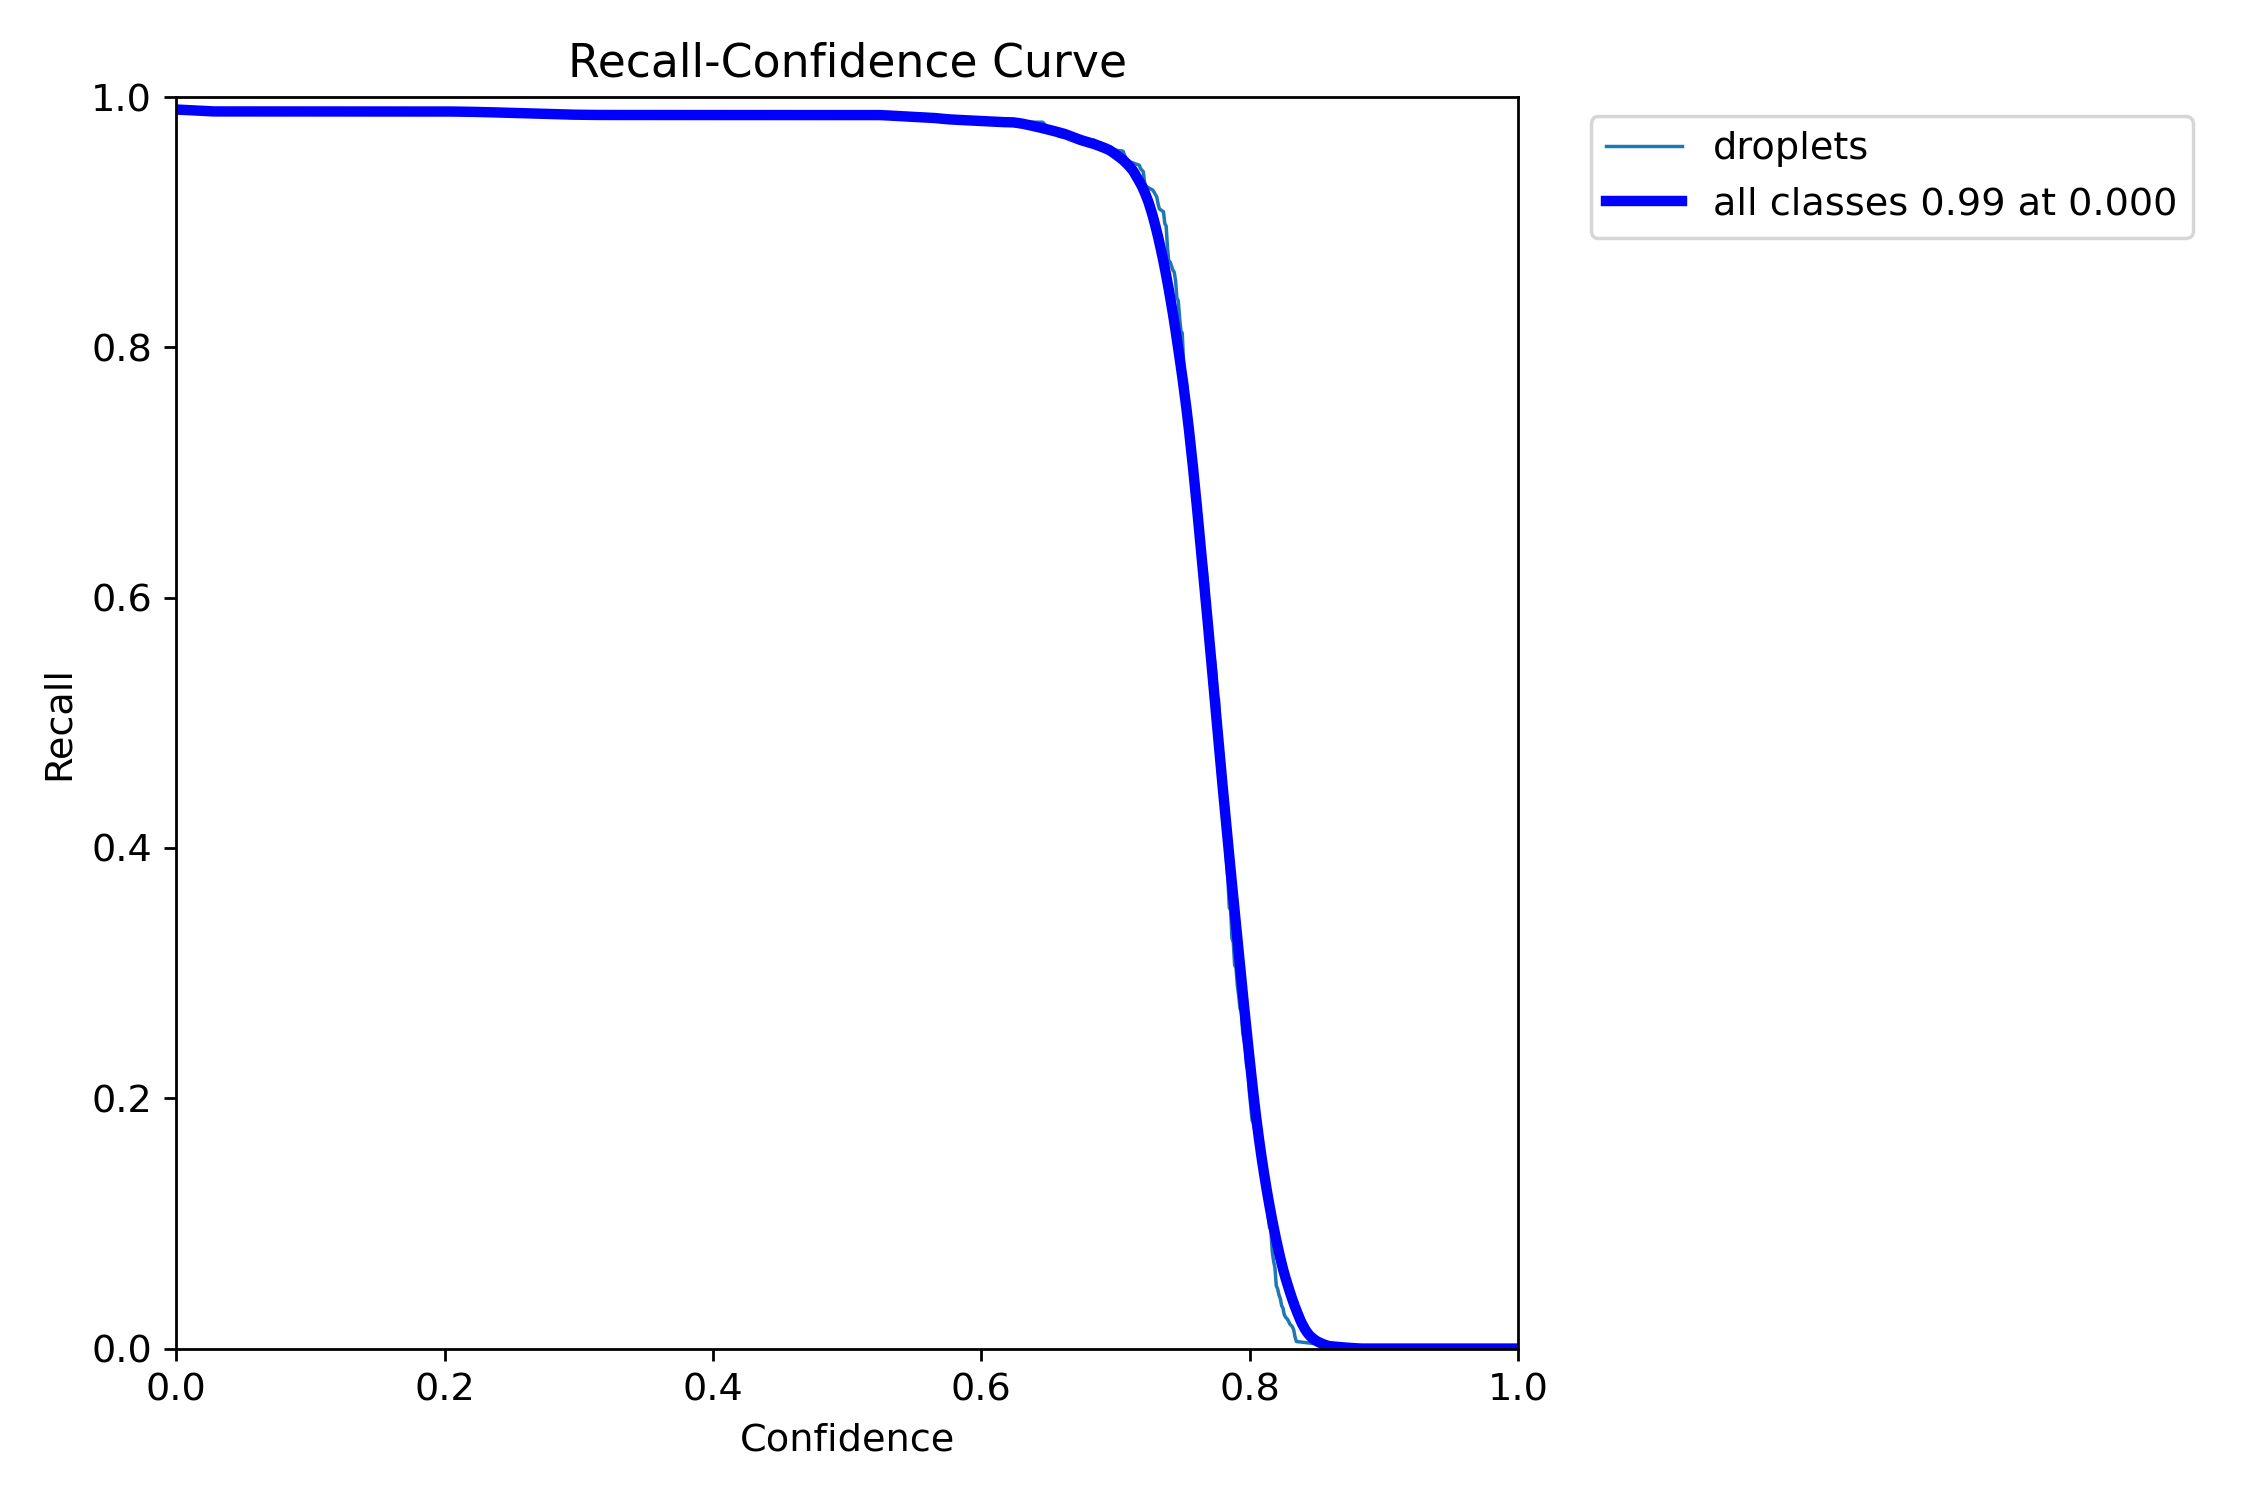

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/R_curve.png', width=600)

## Validate

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.98 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Droplet-Detection-3/valid/labels.cache... 34 images, 1 backgrounds, 0 corrupt: 100% 34/34 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:02<00:00,  1.27it/s]
                   all         34        349      0.986      0.983      0.993      0.617
Speed: 6.2ms preprocess, 22.1ms inference, 0.0ms loss, 8.1ms postprocess per image
Results saved to runs/detect/val


## Test

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.98 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/38 /content/datasets/Droplet-Detection-3/test/images/frame109_png.rf.9d3bd7c087355a7ae83f045dec6d343f.jpg: 640x640 2 dropletss, 16.5ms
image 2/38 /content/datasets/Droplet-Detection-3/test/images/frame10_png.rf.745d103c74203dc4f7a9daebb385f42c.jpg: 640x640 48 dropletss, 16.3ms
image 3/38 /content/datasets/Droplet-Detection-3/test/images/frame115_png.rf.a73a69cb465ee18613e4f9f2df2baa61.jpg: 640x640 2 dropletss, 16.2ms
image 4/38 /content/datasets/Droplet-Detection-3/test/images/frame116_png.rf.9c6582976a1dff9b122fd0090235ecd9.jpg: 640x640 2 dropletss, 16.2ms
image 5/38 /content/datasets/Droplet-Detection-3/test/images/frame123_png.rf.558890994bf031171b4e2bcd88cc5a43.jpg: 640x640 2 dropletss, 16.2ms
image 6/38 /content/datasets/Droplet-Detection-3/test/images/frame12_png.rf.265203d969a3cca84110a7f60d3b1c91

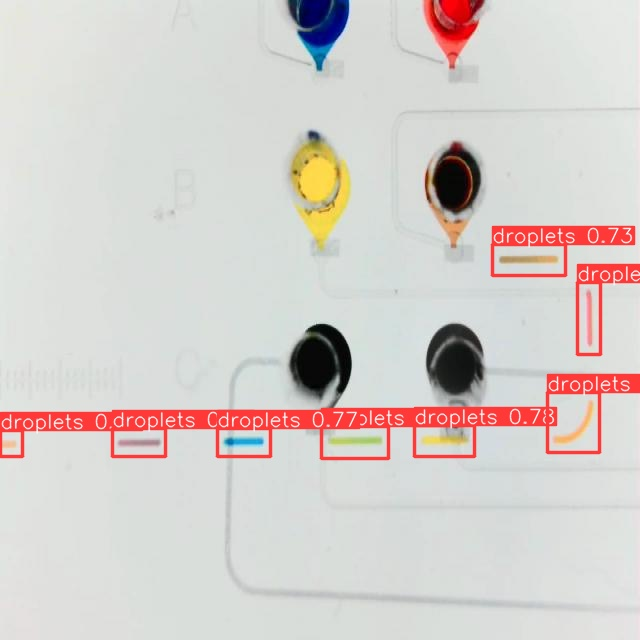

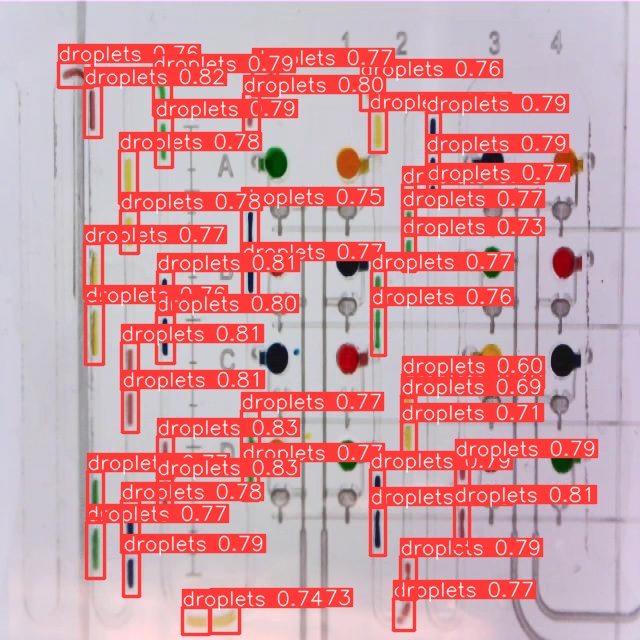

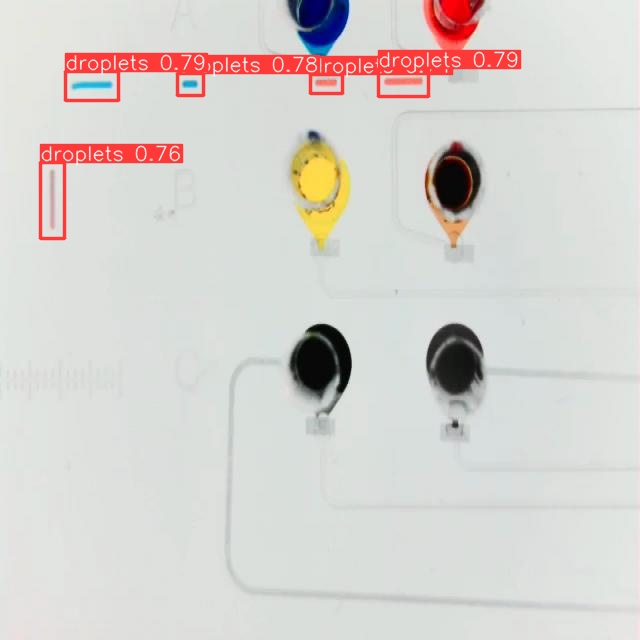

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

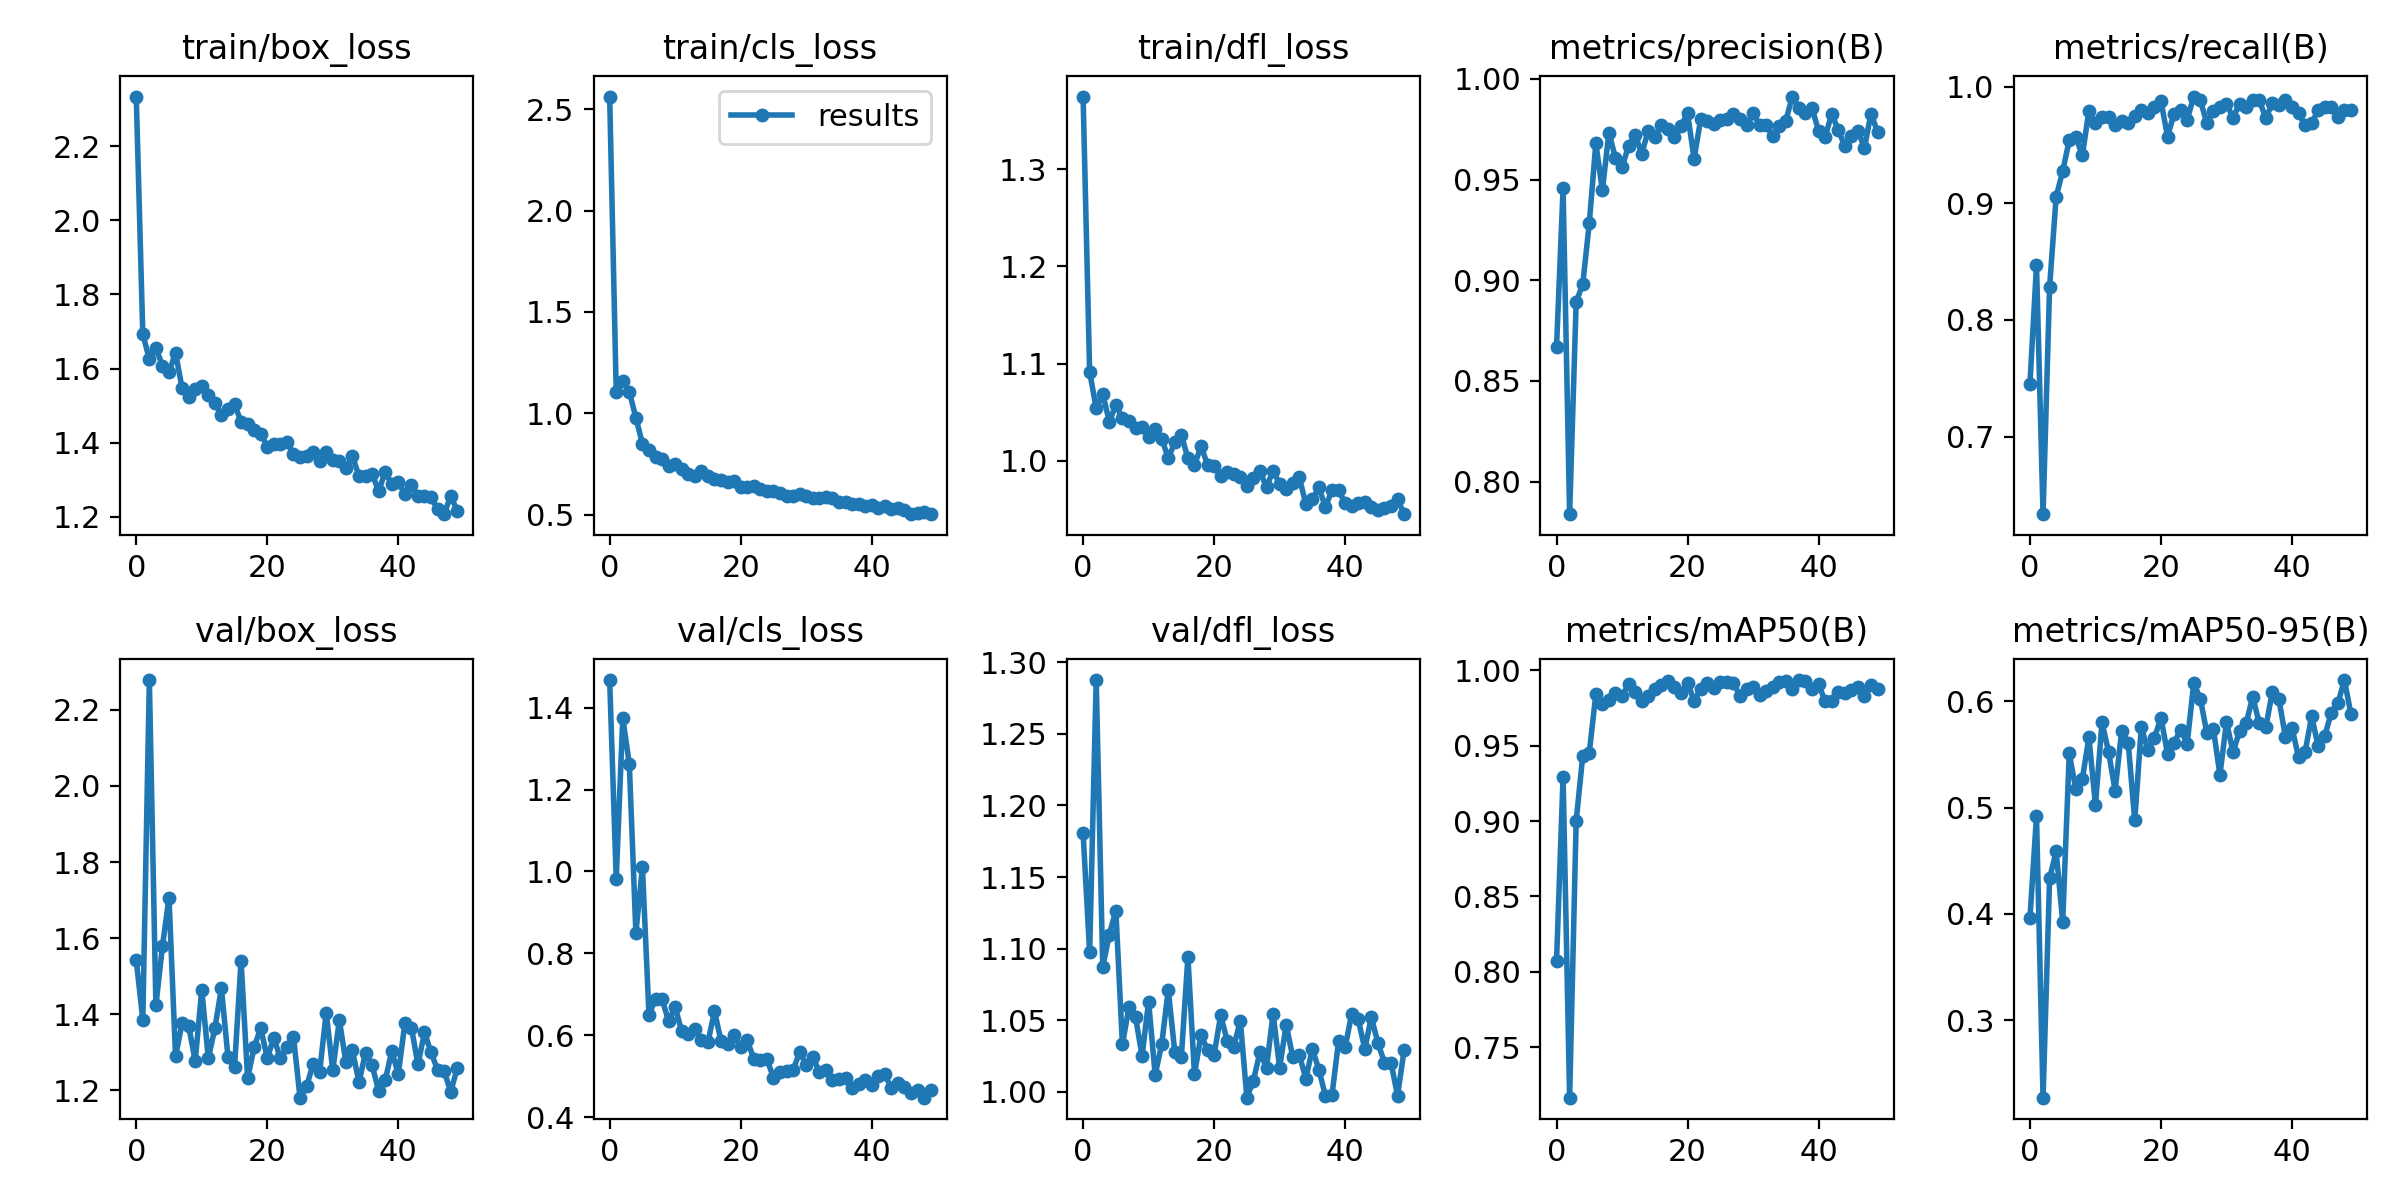

In [ ]:
Image(filename=f'{HOME}/runs/detect/train/results.png', width = 800)